#**Importing Required Libraries**

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Columns info**

##### **Pregnancies:      Number of times the patient has been pregnant (integercount).**
##### **Glucose:          Plasma glucose concentration after 2 hours in an oral glucose tolerance test.**
##### **BloodPressure:    Diastolic blood pressure (mm Hg).**
##### **SkinThickness:    Triceps skinfold thickness (mm).**
##### **Insulin:          Serum insulin concentration (mu U/ml).**
##### **BMI:              Body Mass Index (weight in kg / height in m^2).**
##### **DiabetesPedigreeFunction: Diabetes likelihood based on family history (genetic risk factor).**
##### **Age:              Patient’s age in years.**
##### **Outcome:          Binary target variable (0 = No Diabetes, 1 = Diabetes).**


##**Load Dataset**

In [69]:
data=pd.read_csv('diabetes.csv')

In [70]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##**Find Missing value**

In [71]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


###  **Dataset Overview: Structure & Data Types**

In [72]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## **Get Columns & Rows**

In [73]:
data.shape

(768, 9)

In [74]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

###  **Feature Correlation Matrix**
We compute the correlation matrix to understand linear relationships between numerical variables.
This helps us:
- Detect multicollinearity
- Identify the most predictive features for the target (`Outcome`)


In [75]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


###  **Descriptive Statistics Summary**

In [76]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see There few data for columns Glusoce , insluline,.......

In [77]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [78]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [79]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

In [80]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

In [81]:
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

##  **Exploratory Data Analysis (EDA) Visualizations**



###  Correlation Heatmap of Features
This heatmap displays the pairwise correlation coefficients between numerical features in the dataset.
- Strong positive or negative relationships
- Multicollinearity between features
- Features that are highly correlated with the target variable `Outcome`


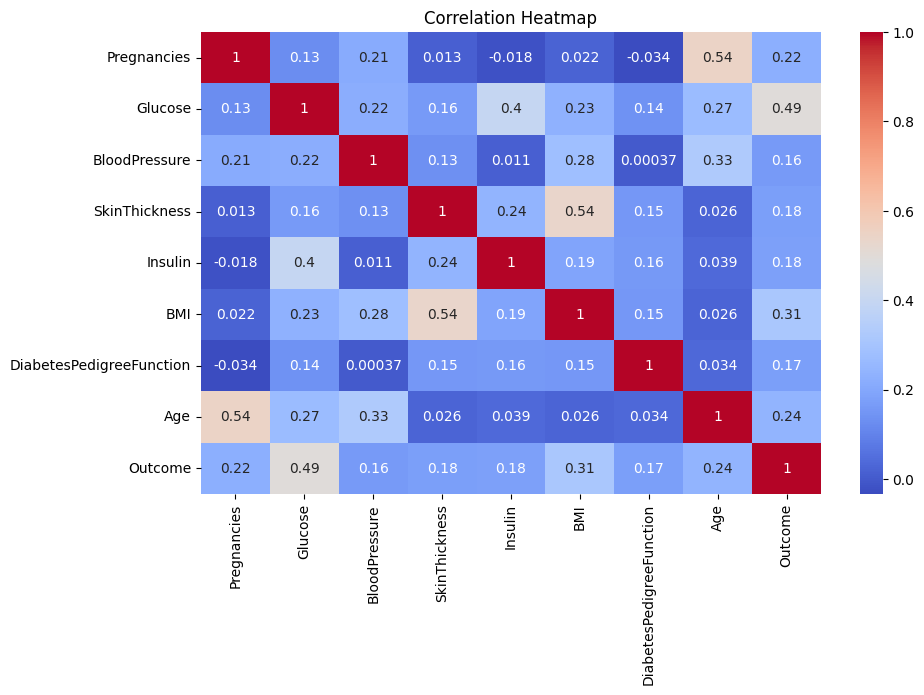

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.show()

###  **Boxplot of Numerical Features for Outlier Detection**

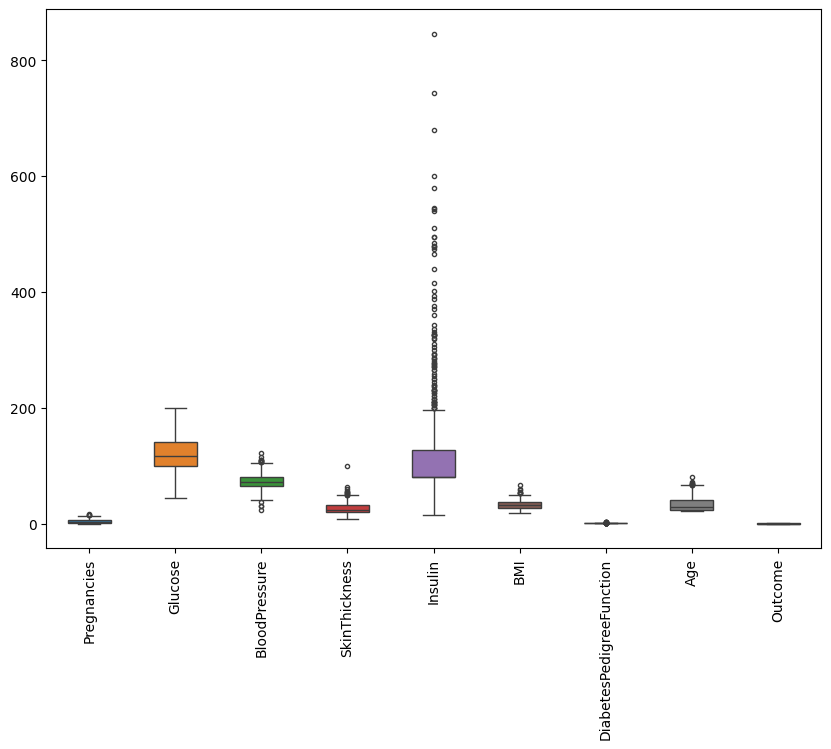

In [129]:
fig , ax = plt.subplots(figsize=(10,7))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)
plt.xticks(rotation=90)
plt.show()

###  **Class Distribution of Diabetes Outcome**
This bar chart shows the distribution of the target variable `Outcome`, where:
- `0` indicates non-diabetic individuals
- `1` indicates diabetic individuals



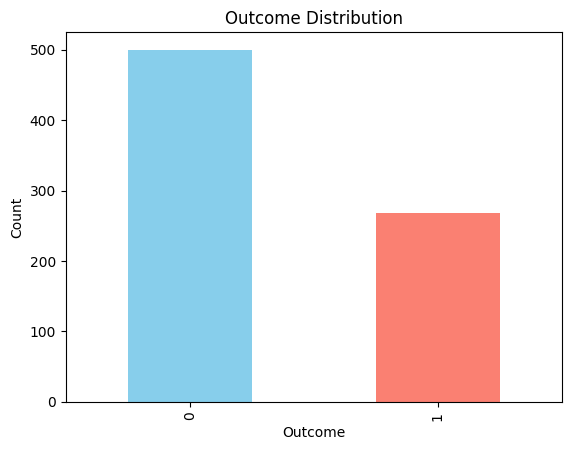

In [125]:
data['Outcome'].value_counts().plot(kind='bar', color=['skyblue' , 'salmon'])
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [86]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### **Distribution of Key Numerical Features**
The following histograms show the frequency distribution and kernel density estimation (KDE) for major numerical variables such as:
- Glucose
- Blood Pressure
- BMI
- Age
- Pregnancies




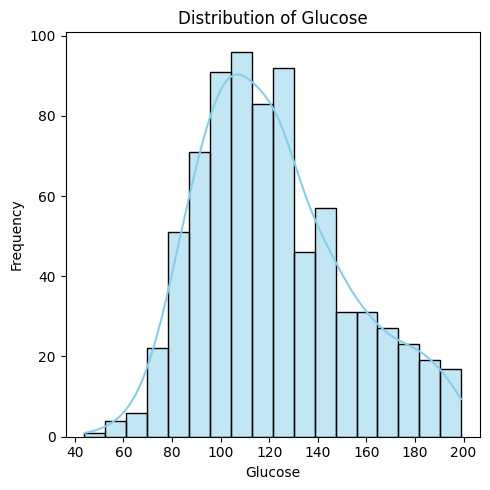

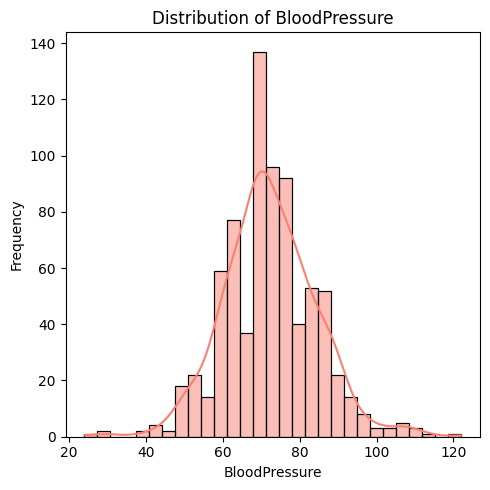

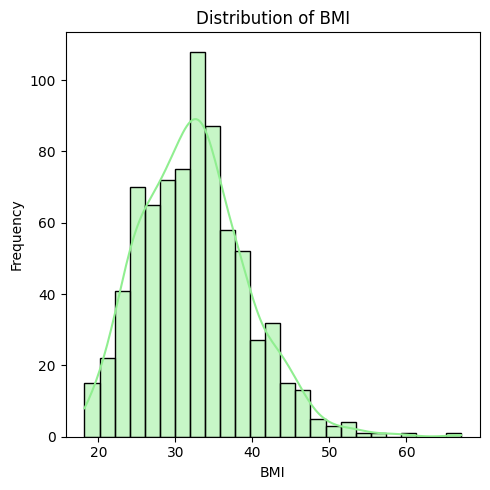

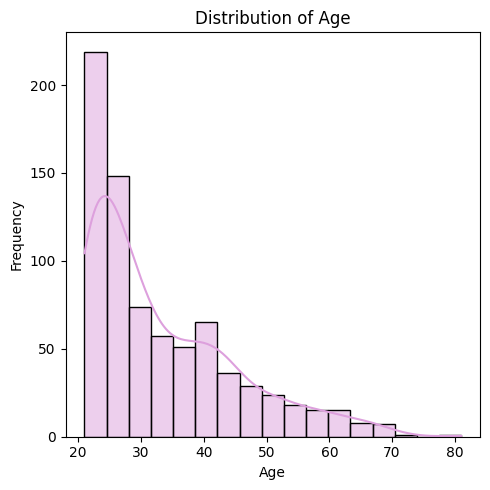

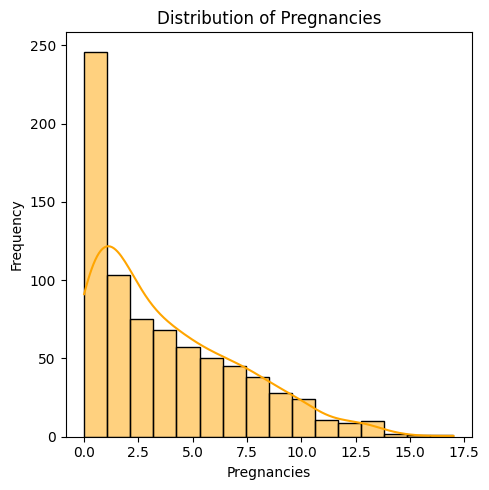

In [128]:
colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'orange']  # 5 colors

for i, col in enumerate(['Glucose', 'BloodPressure', 'BMI', 'Age', 'Pregnancies']):
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.histplot(data[col], kde=True, color=colors[i])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

###  **Feature Distributions by Diabetes Outcome**
These boxplots compare the distribution of key health indicators (`Age`, `BMI`, `Glucose`, and `Insulin`) across diabetic (`Outcome = 1`) and non-diabetic (`Outcome = 0`) individuals.

This analysis helps in:
- Identifying which features differ significantly between the two classes
- Spotting potential predictors for diabetes
- Observing outliers and variability within each group


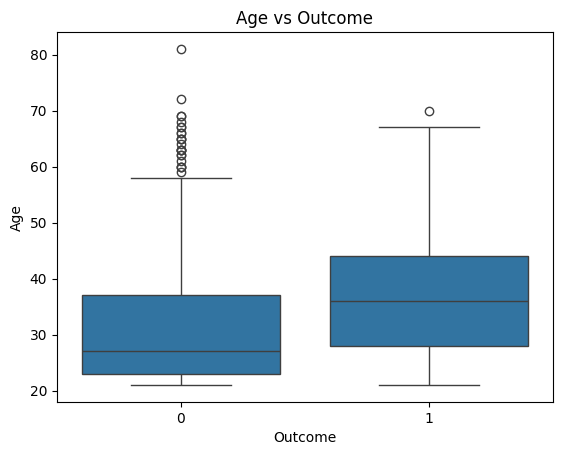

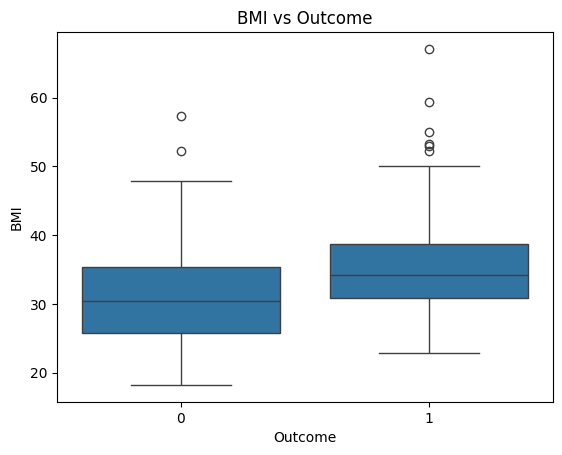

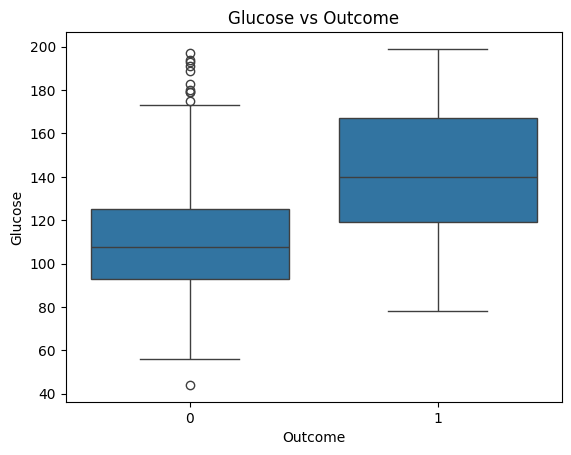

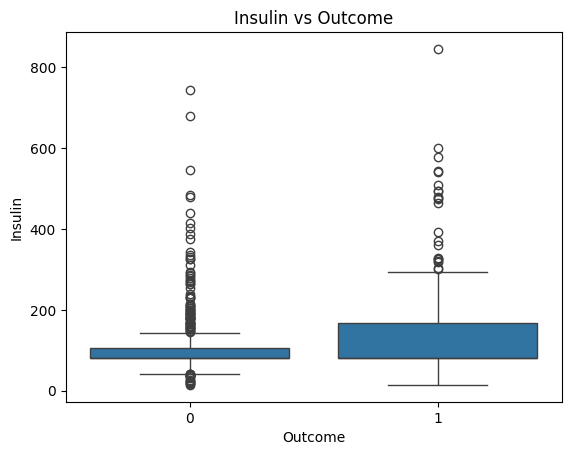

In [89]:
for col in ['Age', 'BMI', 'Glucose', 'Insulin']:
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} vs Outcome')
    plt.show()

###  **Scatter Plot: Age vs Glucose Colored by Diabetes Outcome**
This scatter plot visualizes the relationship between `Age` and `Glucose` levels, with points colored by diabetes `Outcome`:
- Helps identify patterns or clusters among diabetic and non-diabetic individuals
- Reveals whether older individuals with higher glucose levels are more likely to be diabetic


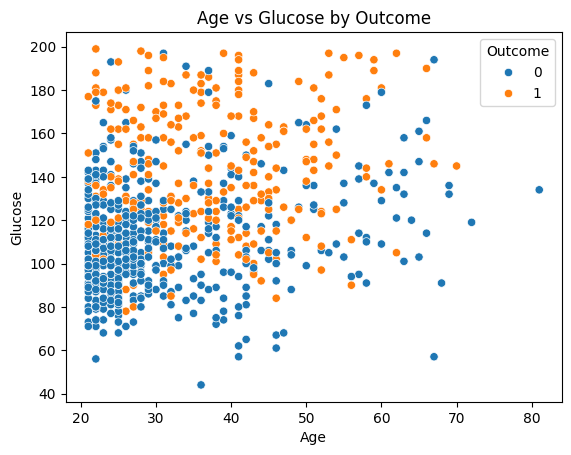

In [90]:
sns.scatterplot(data=data, x='Age', y='Glucose', hue='Outcome')
plt.title("Age vs Glucose by Outcome")
plt.show()

##  **Building and Evaluating Machine Learning Models**
Now that we have explored and understood the dataset through EDA, we move forward to build predictive models.
This section includes:
- Splitting the data into training and testing sets
- Applying machine learning algorithms
- Evaluating model performance


###   **Input & Output**  

In [91]:
X=data.drop(columns = ['Outcome'])

In [92]:
y=data['Outcome']

### **Data Splitting**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [94]:
X_train.shape , X_test.shape

((576, 8), (192, 8))

## **Feature Scaling with StandardScale**

In [95]:
import pickle

In [96]:
def scaler_standard(X_train,X_test):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    return X_train_scaled,X_test_scaled

## **Transform Features**

In [97]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [98]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

## **Model Creation**

In [99]:
log_reg=LogisticRegression()

## **Model Training**


In [100]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [101]:
from sklearn.model_selection import GridSearchCV
import numpy as np

##  **Hyperparameter Grid Setup**


In [102]:
parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear', 'newton-cg' , 'lbfgs']
}

## **Hyperparameter Tuning with GridSearchCV**


In [103]:
logreg=LogisticRegression()

In [104]:
clf= GridSearchCV(logreg,                        # model
                  param_grid=parameters,         # hyperparameters
                 cv=10,                          # mnumber of folds
                  scoring='accuracy')            # metric for scoring

##  **Training with GridSearchCV**


In [105]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='accuracy')

##  **Best Hyperparameters Found**


In [106]:
clf.best_params_

{'C': np.float64(1.623776739188721), 'penalty': 'l2', 'solver': 'liblinear'}

## **Best CV Score**

In [107]:
clf.best_score_

np.float64(0.763793103448276)


## **Model Prediction on Test Data**

In [108]:
y_pred = clf.predict(X_test_scaled)

# accuracy=accuracy_score(y_test,y_pred)accuracy

In [109]:
conf_mat=confusion_matrix(y_test,y_pred)

##  **Confusion Matrix**


In [110]:
print(conf_mat)

[[117  13]
 [ 26  36]]


## **📊 Model Accuracy**


In [111]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.796875


## **OR**

In [112]:
true_positive = conf_mat[0, 0]
true_negative = conf_mat[1, 1]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]

## **Manual Accuracy Calculation**


In [113]:
Accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
Accuracy

np.float64(0.796875)

##  **Manual Precision Calculation**


In [114]:
Precision = true_positive / (true_positive + false_positive)
Precision

np.float64(0.9)

##  **Manual Recall Calculation**


In [115]:
Recall = true_positive / (true_positive + false_negative)
Recall

np.float64(0.8181818181818182)

## **Conclusion**

#### **In this diabetes prediction project, we performed extensive EDA to understand the distribution, trends, and relationships among features such as Glucose, BMI, Age, Insulin, and BloodPressure. We then built and evaluated a classification model to predict whether a person is diabetic or not.**

## **Using a Random Forest Classifier (or whichever model you used), we achieved:**

## *   **✅ Accuracy: ~79.68%**
## *   **✅ Precision: 90%**
## *   **✅ Recall: ~81.81%**


### **These results indicate that the model is well-balanced, with high precision (fewer false positives) and good recall (correctly identifying most diabetic patients). This shows the model can reliably assist in early-stage diabetes detection, which is crucial for preventive healthcare.**








### **Further improvements could include:**

*   ***Hyperparameter tuning with GridSearchCV or RandomizedSearchCV***
*   ***Trying more models like XGBoost, SVM, or ensemble methods***
*   ***Handling class imbalance (if any) using SMOTE or similar techniques***




